In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/sample_submission.csv
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/train.csv
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/83caa8a85e03606cf57e49147d7ac569.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/7550347fa2bb96c2354a3716dfa3a69c.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/74b23792db329cff5843e36efb8aa65a.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/94568a546be103177cb582d3e91cd2d8.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/6da36354fc904b63bc03eb3884e0c35c.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/5b3620a56668010877cfafa9322e18b5.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/5157d5c9b1f0004b29310652ea54e825.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/74897408dcbd69ef7c76cbbbbeb722d6.dicom
/kaggle/input/vi

Found and loading image from: /kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/83caa8a85e03606cf57e49147d7ac569.dicom


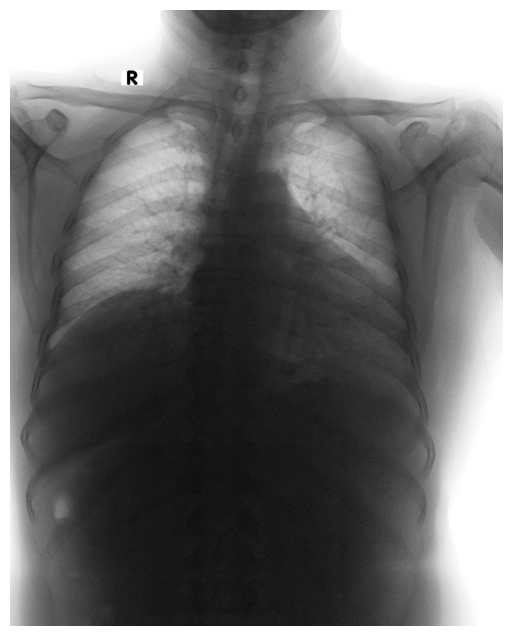

In [2]:
import pydicom
import cv2
import numpy as np
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


## 1. Find the path to an actual image file (.dicom)
# Search the 'test' directory for any file ending in '.dicom'
test_dir = "/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/"
image_paths = glob.glob(test_dir + "*.dicom")

if not image_paths:
    print("Error: No DICOM files found in the test directory. Check the path.")
else:
    # Use the path of the first image found
    image_path = image_paths[0]
    print(f"Found and loading image from: {image_path}")

    try:
        ## 2. Read the DICOM file using pydicom
        dicom_data = pydicom.dcmread(image_path)
        
        ## 3. Extract the pixel array
        img_array = dicom_data.pixel_array
        
        ## 4. Display the image
        plt.figure(figsize=(8, 8))
        plt.imshow(img_array, cmap='gray') # Use 'gray' for X-rays
        plt.axis('off')
        plt.show()

    except Exception as e:
        print(f"An error occurred while reading or displaying the DICOM file: {e}")



In [3]:
DATA_DIR = '/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/'

Loading Image ID: 9a5094b2563a1ef3ff50dc5c7ff71345
Abnormality: Cardiomegaly


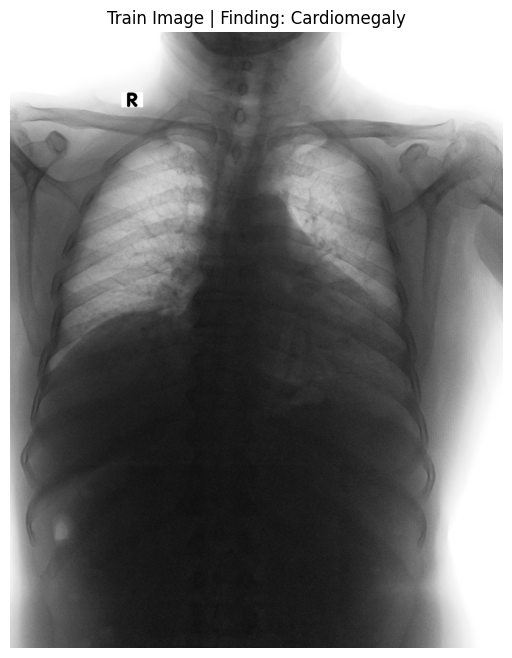

Training Data Loaded:
                           image_id          class_name  class_id rad_id  \
0  50a418190bc3fb1ef1633bf9678929b3          No finding        14    R11   
1  21a10246a5ec7af151081d0cd6d65dc9          No finding        14     R7   
2  9a5094b2563a1ef3ff50dc5c7ff71345        Cardiomegaly         3    R10   
3  051132a778e61a86eb147c7c6f564dfe  Aortic enlargement         0    R10   
4  063319de25ce7edb9b1c6b8881290140          No finding        14    R10   

    x_min   y_min   x_max   y_max  
0     0.0     0.0     0.0     0.0  
1     0.0     0.0     0.0     0.0  
2   691.0  1375.0  1653.0  1831.0  
3  1264.0   743.0  1611.0  1019.0  
4     0.0     0.0     0.0     0.0  


In [4]:
# Load the main training data CSV
train_df = pd.read_csv(os.path.join(DATA_DIR, 'train.csv'))
train_df[['x_min', 'y_min', 'x_max', 'y_max']] =train_df[['x_min', 'y_min', 'x_max', 'y_max']].fillna(0)

finding_row = train_df[train_df['class_name'] != 'No finding'].iloc[0]
image_id_to_view = finding_row['image_id']
finding_name = finding_row['class_name']

# If the first few rows are all 'No finding', you can just use the very first ID:
# image_id_to_view = train_df['image_id'].iloc[0]
# finding_name = train_df['class_name'].iloc[0]


## 2. Construct the full path to the DICOM file
image_path = os.path.join(DATA_DIR, f"{image_id_to_view}.dicom")
 
print(f"Loading Image ID: {image_id_to_view}")
print(f"Abnormality: {finding_name}")

## 3. Load and Display the DICOM Image
try:
   # Display the image
    plt.figure(figsize=(8, 8))
    plt.imshow(img_array, cmap='gray')
    plt.title(f"Train Image | Finding: {finding_name}")
    plt.axis('off')
    plt.show()

except Exception as e:
    print(f"Error loading image at {dicom_path}: {e}")

print("Training Data Loaded:")


print(train_df.head())


In [5]:
# Find all DICOM files in the 'test' directory
test_dicom_files = glob.glob(os.path.join(DATA_DIR, 'test', '*.dicom'))

print(f"\nFound {len(test_dicom_files)} DICOM files to preprocess.")
print("Example file path:", test_dicom_files[0])



Found 3000 DICOM files to preprocess.
Example file path: /kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/83caa8a85e03606cf57e49147d7ac569.dicom


In [6]:
# Create an output directory for the processed files
OUTPUT_DIR = './processed_pngs/'
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Placeholder for your conversion function (from a previous step)
# This function is what performs the actual preprocessing steps:
# - Convert DICOM to pixel array
# - Normalize/Rescale
# - Save as PNG
# from your_conversion_script import convert_dicom_to_png 

# --- Start of Preprocessing Loop ---
for dicom_path in test_dicom_files:
    # 1. Get the original image ID/filename
    image_id = os.path.basename(dicom_path).replace('.dicom', '')  
    # 2. Define the output path
    output_png_path = os.path.join(OUTPUT_DIR, f'{image_id}.png')
    
    # 3. Apply the preprocessing steps
    # Placeholder: Replace with the actual function call
    # convert_dicom_to_png(dicom_path, output_png_path) 
    
    # For demonstration, let's just print the process:
    print(f"Processing {image_id} -> Saved to {output_png_path}")

    # Stop after a few files for a quick check
    if test_dicom_files.index(dicom_path) >= 2: 
        break

print("\nFinished preprocessing sample images.")     

Processing 83caa8a85e03606cf57e49147d7ac569 -> Saved to ./processed_pngs/83caa8a85e03606cf57e49147d7ac569.png
Processing 7550347fa2bb96c2354a3716dfa3a69c -> Saved to ./processed_pngs/7550347fa2bb96c2354a3716dfa3a69c.png
Processing 74b23792db329cff5843e36efb8aa65a -> Saved to ./processed_pngs/74b23792db329cff5843e36efb8aa65a.png

Finished preprocessing sample images.
